In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [119]:
data_house = pd.read_csv("kc_house_data.csv")
data_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [120]:
data_house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [121]:
data_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [122]:
data_house.drop_duplicates(subset='id', keep='first', inplace=True)

In [123]:
data_house.shape

(21436, 21)

In [124]:
data_house['date'] = pd.to_datetime(data_house['date'])

data_house['Year'] = data_house['date'].dt.year
data_house['Month'] = data_house['date'].dt.month
data_house['Day'] = data_house['date'].dt.day

data_house.drop(columns=['date'], inplace=True)


In [125]:
data_house['bathrooms'] = data_house['bathrooms'].astype('int')
data_house['floors'] = data_house['floors'].astype('int')

In [126]:
data_house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21436 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21436 non-null  int64  
 1   price          21436 non-null  float64
 2   bedrooms       21436 non-null  int64  
 3   bathrooms      21436 non-null  int64  
 4   sqft_living    21436 non-null  int64  
 5   sqft_lot       21436 non-null  int64  
 6   floors         21436 non-null  int64  
 7   waterfront     21436 non-null  int64  
 8   view           21436 non-null  int64  
 9   condition      21436 non-null  int64  
 10  grade          21436 non-null  int64  
 11  sqft_above     21436 non-null  int64  
 12  sqft_basement  21436 non-null  int64  
 13  yr_built       21436 non-null  int64  
 14  yr_renovated   21436 non-null  int64  
 15  zipcode        21436 non-null  int64  
 16  lat            21436 non-null  float64
 17  long           21436 non-null  float64
 18  sqft_living

In [127]:
data_house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Year', 'Month', 'Day'],
      dtype='object')

In [128]:
data_house['waterfront'].value_counts()

waterfront
0    21273
1      163
Name: count, dtype: int64

<Axes: xlabel='sqft_basement', ylabel='price'>

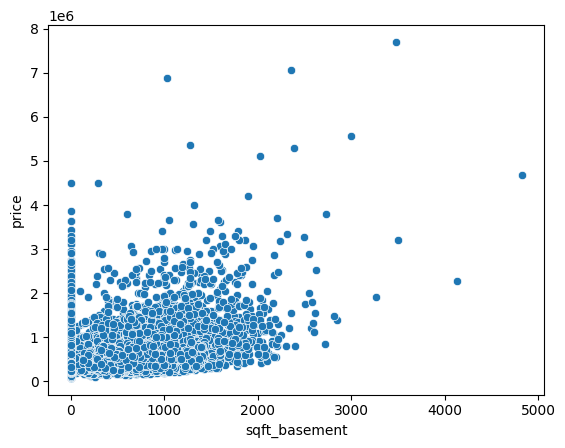

In [129]:
sns.scatterplot(x = data_house['sqft_basement'], y = data_house['price'])

In [130]:
data_house['sqft_basement'].value_counts()

sqft_basement
0       13015
600       220
700       215
500       211
800       206
        ...  
176         1
225         1
1275        1
274         1
248         1
Name: count, Length: 306, dtype: int64

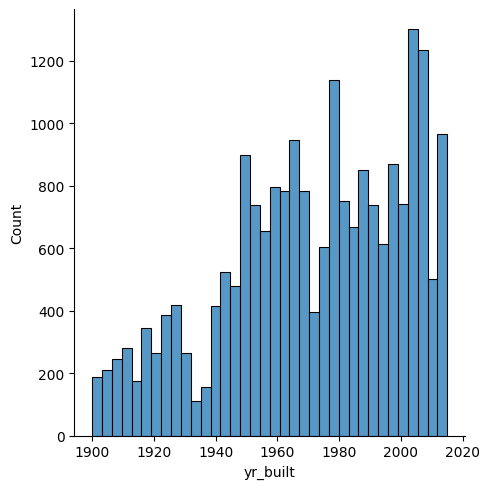

In [131]:
sns.displot(data_house['yr_built'])

<Axes: xlabel='yr_renovated', ylabel='price'>

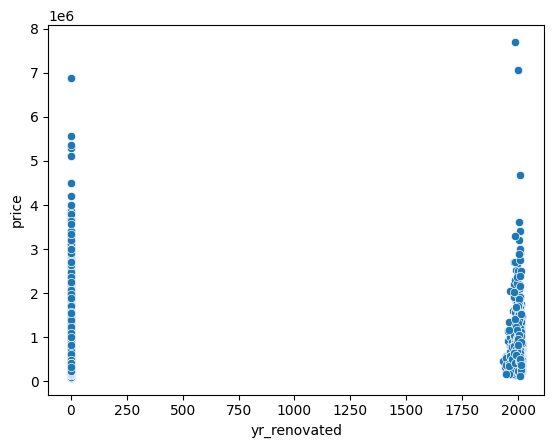

In [132]:
sns.scatterplot(x=data_house['yr_renovated'], y=data_house['price']) # remove

In [133]:
data_house['yr_renovated'].value_counts()

yr_renovated
0       20526
2014       91
2013       37
2003       36
2005       35
        ...  
1948        1
1951        1
1959        1
1934        1
1944        1
Name: count, Length: 70, dtype: int64

<Axes: xlabel='zipcode', ylabel='price'>

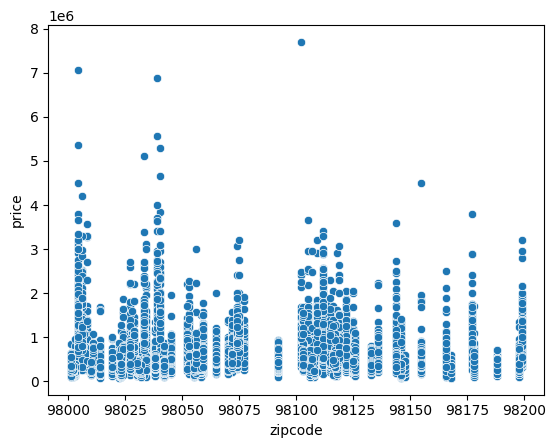

In [134]:
sns.scatterplot(x='zipcode', y='price', data=data_house)

<Axes: xlabel='lat', ylabel='price'>

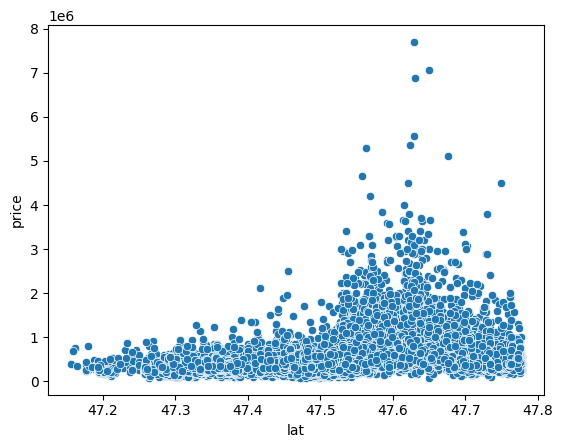

In [135]:
sns.scatterplot(x = 'lat', y = 'price', data=data_house)

<Axes: xlabel='sqft_living'>

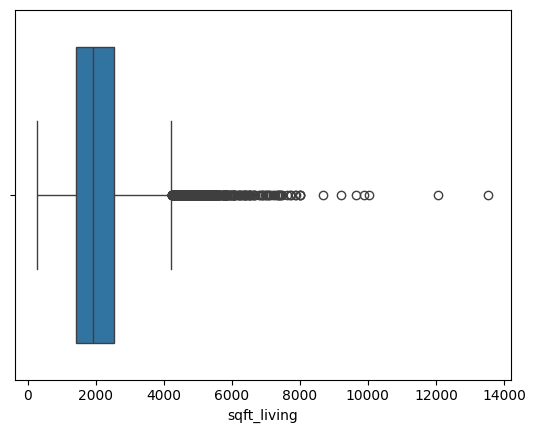

In [136]:
sns.boxplot(x = data_house['sqft_living'])

In [137]:
data_house['sqft_living'].value_counts()

sqft_living
1300    136
1440    133
1400    132
1800    128
1660    128
       ... 
2398      1
2656      1
3281      1
1458      1
1572      1
Name: count, Length: 1038, dtype: int64

In [138]:
data_house['sqft_living'].describe()


count    21436.000000
mean      2082.704936
std        919.146469
min        290.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [139]:
data_house[data_house['sqft_living'] < 5000] = data_house['sqft_living'].median()


<Axes: xlabel='sqft_living'>

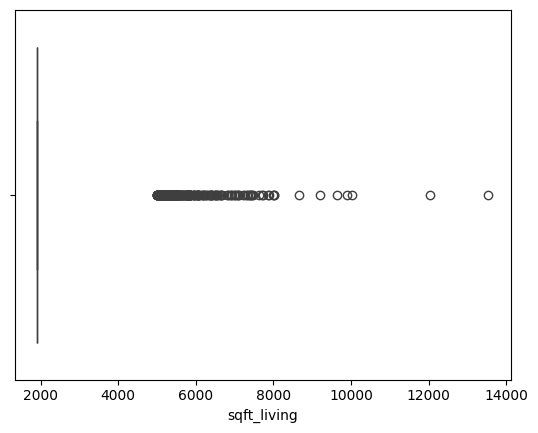

In [140]:
sns.boxplot(x = data_house['sqft_living'])


In [142]:
data_house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21436 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21436 non-null  int64  
 1   price          21436 non-null  float64
 2   bedrooms       21436 non-null  int64  
 3   bathrooms      21436 non-null  int64  
 4   sqft_living    21436 non-null  int64  
 5   sqft_lot       21436 non-null  int64  
 6   floors         21436 non-null  int64  
 7   waterfront     21436 non-null  int64  
 8   view           21436 non-null  int64  
 9   condition      21436 non-null  int64  
 10  grade          21436 non-null  int64  
 11  sqft_above     21436 non-null  int64  
 12  sqft_basement  21436 non-null  int64  
 13  yr_built       21436 non-null  int64  
 14  yr_renovated   21436 non-null  int64  
 15  zipcode        21436 non-null  int64  
 16  lat            21436 non-null  float64
 17  long           21436 non-null  float64
 18  sqft_living

In [143]:
data_house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Year,Month,Day
0,1920,1920.0,1920,1920,1920,1920,1920,1920,1920,1920,...,1920,1920,1920,1920.0,1920.0,1920,1920,1920,1920,1920
1,1920,1920.0,1920,1920,1920,1920,1920,1920,1920,1920,...,1920,1920,1920,1920.0,1920.0,1920,1920,1920,1920,1920
2,1920,1920.0,1920,1920,1920,1920,1920,1920,1920,1920,...,1920,1920,1920,1920.0,1920.0,1920,1920,1920,1920,1920
3,1920,1920.0,1920,1920,1920,1920,1920,1920,1920,1920,...,1920,1920,1920,1920.0,1920.0,1920,1920,1920,1920,1920
4,1920,1920.0,1920,1920,1920,1920,1920,1920,1920,1920,...,1920,1920,1920,1920.0,1920.0,1920,1920,1920,1920,1920


In [144]:
data_house.shape

(21436, 23)

In [145]:
input = data_house.drop(columns=['price'])
output = data_house['price']

In [146]:
x_train, x_test, y_train, y_test = train_test_split(input, output, random_state=42, test_size=0.3)

In [147]:
scaler = StandardScaler()
# data_house[['zipcode', 'sqft_living']] = scaler.fit_transform(data_house[['zipcode', 'sqft_living']])

scaler.fit(x_train)
x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

x_train_scaler = pd.DataFrame(x_train_scaler, columns=input.columns)
x_test_scaler = pd.DataFrame(x_test_scaler, columns=input.columns)



In [148]:
model = LinearRegression()
model.fit(x_train_scaler, y_train)

LinearRegression()

In [149]:
y_pred = model.predict(x_test_scaler)
y_pred[:5]

array([1920.0000004, 1920.0000004, 1920.0000004, 1920.0000004,
       1920.0000004])

In [150]:
y_test[:5]

6355     1920.0
20958    1920.0
1226     1920.0
1927     1920.0
17776    1920.0
Name: price, dtype: float64

In [151]:

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


R² Score: 0.8968878807252081


In [152]:

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:,.2f}")
print(f"Root Mean Squared Error: {rmse:,.2f}")


Mean Squared Error: 5,203,133,064.16
Root Mean Squared Error: 72,132.75


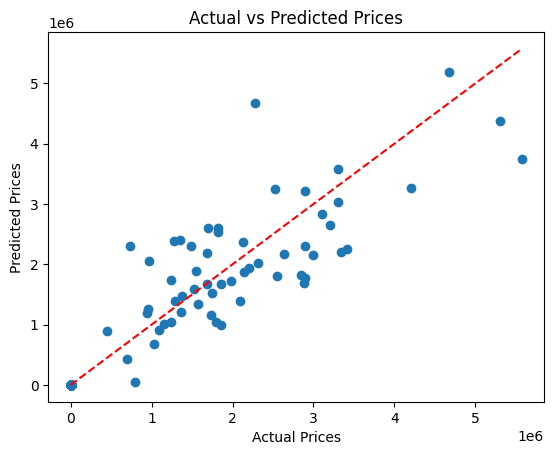

In [153]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()
